# COORDINATE REPROJECTION PROJECT

>## AIM
The main AIM is to reproject projected coordinates (xyz) to a user-defined coordinate system (local xyz) (e.g. for data analysis and data visualisation).

>## OVERVIEW

>### 1. Basic actions with coordinates
This section comprises a series of 'basic' actions to deal with projected coordinates. The main idea is to be able to convert  textfiles that contain xyz coordinates (e.g. GPS data collected during fieldwork) to shapefiles (or GeoJSON). One should be able to convert (a) the entire file, (b) a selection of the data based on attribute data, or (c) a selection of the data based on spatial location. Additionally, we want to switch between EPSG projections.

>An overview of the actions:
1. read coordinates from textfile (.txt) and convert these to a shapefile (or GeoJSON).
2. read coordinates from textfile (.txt), select coordinates by attribute and write these to shapefile (or GeoJSON).
3. read coordinates from textfile (.txt), select coordinates by spatial location and write these to shapefile (or GeoJSON).
4. switch from one EPSG projected coordinate system to another.


>### 2. Main objectives/challenges
The main AIM of this project is to reproject projected coordinates (xyz) to a user-defined coordinate system (local xyz). Therefore, three main objectives/challenges are pursued:
1. SHIFT from projected coordinates to user-defined coordinates.
2. SHIFT and ROTATE from projected coordinates to user-defined coordinates.
3. SHIFT, ROTATE and TILT from projected coordinates to user-defined coordinates (e.g. to visualise vertical data; soil profiles).

>### 3. Ideas
A series possible coordinate manipulations are currently on the ideas/thoughts level, but have potential to be useful.
1. SCALE (shrink/enlarge) to user-defined coordinate system (with/out rotation and/or tilt?)

___

## NOTE
This notebook only deals with *basic actions with coordinates 1*:
> **Read coordinates from textfile (.txt) and convert these to a shapefile (or GeoJSON).**

## CODE

In [1]:
# GUI user interface
from tkinter import Tk
import tkinter.filedialog as tkfd
import tkinter.simpledialog as tksd

# to perform conversion
import csv
from osgeo import ogr, osr

# to visualise example
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

Let's have a quick look at out input textfile (example).

In [2]:
root = Tk()
input_textfile = tkfd.askopenfilename(title = "Select input textfile", 
                                      initialdir = "C:/", 
                                      filetypes = (("textfile", "*.txt"),("all files", "*.*")))
root.destroy()

In [3]:
input_textfile

'C:/WERKMAP/Anaconda/coordinaten_project/DrongengoedCoord.txt'

In [4]:
example = pd.read_csv(input_textfile, 
                      delimiter = ",", 
                      lineterminator = "\n")

In [5]:
example.head(10)

,ID,X,Y,Z,CODE
0,1,86837.211,204464.230,25.272,GCP00
1,2,86840.454,204463.504,25.309,GCP00
2,3,86821.776,204469.102,25.097,GCP00
3,4,86815.840,204472.849,24.607,GCP01
4,5,86814.639,204469.858,24.585,GCP01
5,6,86822.362,204468.977,24.589,GCP01
6,7,86830.047,204468.465,24.673,GCP01
7,8,86828.921,204465.311,24.578,GCP01
8,9,86837.190,204464.598,25.037,GCP01
9,10,86845.084,204464.014,25.026,GCP01


In [6]:
reader = csv.DictReader(open(input_textfile), 
                        delimiter = ",", 
                        lineterminator = "\n", 
                        quoting = csv.QUOTE_NONE)

In [7]:
reader

In [8]:
root = Tk()
output_shapefile = tkfd.asksaveasfilename(title = "Select output location and define output filename.shp", 
                                          initialdir = "C:/", 
                                          filetypes = (("shapefile", ".shp"), ("all types", "*.*")))
root.destroy()

In [9]:
output_shapefile

'C:/WERKMAP/Anaconda/coordinaten_project/boomaya.shp'

In [10]:
driver = ogr.GetDriverByName("ESRI Shapefile")
data_source = driver.CreateDataSource(output_shapefile)

In [11]:
root = Tk()
spatial_reference = tksd.askstring(title= "define spatial reference", 
                                   prompt = "define spatial reference (EPSG code)")
root.destroy()

In [12]:
spatialRef = osr.SpatialReference()
spatialRef.ImportFromUrl("http://spatialreference.org/ref/epsg/" + spatial_reference + "/")

0

In [13]:
print(spatialRef)

PROJCS["Belge 1972 / Belgian Lambert 72",
    GEOGCS["Belge 1972",
        DATUM["Reseau_National_Belge_1972",
            SPHEROID["International 1924",6378388,297,
                AUTHORITY["EPSG","7022"]],
            TOWGS84[106.869,-52.2978,103.724,-0.33657,0.456955,-1.84218,1],
            AUTHORITY["EPSG","6313"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.01745329251994328,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4313"]],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    PROJECTION["Lambert_Conformal_Conic_2SP"],
    PARAMETER["standard_parallel_1",51.16666723333333],
    PARAMETER["standard_parallel_2",49.8333339],
    PARAMETER["latitude_of_origin",90],
    PARAMETER["central_meridian",4.367486666666666],
    PARAMETER["false_easting",150000.013],
    PARAMETER["false_northing",5400088.438],
    AUTHORITY["EPSG","31370"],
    AXIS["X",EAST],
    AXIS["Y",NORTH]]


In [14]:
layer = data_source.CreateLayer('coordlayer', spatialRef, ogr.wkbPoint)

In [15]:
field_name = ogr.FieldDefn("ID", ogr.OFTString)
field_name.SetWidth(5)
layer.CreateField(field_name)
field_region = ogr.FieldDefn("CODE", ogr.OFTString)
field_region.SetWidth(24)
layer.CreateField(field_region)
layer.CreateField(ogr.FieldDefn("X", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("Y", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("Z", ogr.OFTReal))

0

In [16]:
for row in reader:
    feature = ogr.Feature(layer.GetLayerDefn())
    feature.SetField("ID", row['ID'])
    feature.SetField("CODE", row['CODE'])
    feature.SetField("X", row['X'])
    feature.SetField("Y", row['Y'])
    feature.SetField("Z", row['Z'])
    wkt = "POINT(%f %f)" %  (float(row['X']) , float(row['Y']))
    point = ogr.CreateGeometryFromWkt(wkt)
    feature.SetGeometry(point)
    layer.CreateFeature(feature)
    feature = None

In [17]:
data_source = None

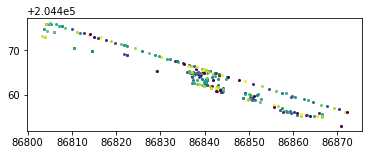

In [18]:
check_output_1_1 = gpd.read_file(output_shapefile)
check_output_1_1.plot()